In [1]:
import pandas as pd
from datetime import datetime
import calendar
pd.set_option('display.max_rows', 100)

In [2]:
train = pd.read_csv('DF914_data.csv', encoding='ISO-8859-1')

/Users/wonhee/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (5,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
train.head()

,ClientId,# of Orders Placed,# Different products (SKUs) purchased,# of Items Purchased,Max Orders for one SKU,Total Value of all Orders Placed,City,OriginalState,State,Country,Phone,Real Email,Notes,Opt Out,LastPurchaseDate,FirstPurchaseDate
0,29.0,2.0,1.0,2.0,2.0,27.97,ASPERS,PA,PA,US,NaN,NaN,NaN,NaN,2019-03-15 18:36,2017-06-01 9:44
1,48.0,9.0,1.0,9.0,9.0,123.85,ELIZABETHTOWN,KY,KY,US,NaN,NaN,NaN,NaN,2019-07-18 1:49,2017-06-23 12:57
2,63.0,4.0,1.0,4.0,4.0,57.92,BOCA RATON,FL,FL,US,NaN,NaN,NaN,NaN,2018-06-17 16:16,2017-06-16 6:59
3,125.0,1.0,1.0,1.0,1.0,14.98,San Francisco,California,CA,US,NaN,NaN,NaN,NaN,2018-01-11 17:47,2017-06-27 21:02
4,136.0,1.0,1.0,1.0,1.0,31.99,EDEN,UT,UT,US,NaN,NaN,NaN,NaN,2019-07-16 10:10,2017-06-27 16:31


In [4]:
train.shape

(38150, 16)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38150 entries, 0 to 38149
Data columns (total 16 columns):
ClientId                                 38149 non-null float64
# of Orders Placed                       38067 non-null float64
# Different products (SKUs) purchased    38067 non-null float64
# of Items Purchased                     38067 non-null float64
Max Orders for one SKU                   38067 non-null float64
Total Value of all Orders Placed         38067 non-null object
City                                     38143 non-null object
OriginalState                            38139 non-null object
State                                    38142 non-null object
Country                                  38142 non-null object
Phone                                    0 non-null float64
Real Email                               1 non-null float64
Notes                                    2 non-null object
Opt Out                                  1 non-null object
LastPurchaseDate  

In [6]:
train = train.drop(['Phone', 'Real Email', 'Notes', 'Opt Out', 'OriginalState'], axis=1)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38150 entries, 0 to 38149
Data columns (total 11 columns):
ClientId                                 38149 non-null float64
# of Orders Placed                       38067 non-null float64
# Different products (SKUs) purchased    38067 non-null float64
# of Items Purchased                     38067 non-null float64
Max Orders for one SKU                   38067 non-null float64
Total Value of all Orders Placed         38067 non-null object
City                                     38143 non-null object
State                                    38142 non-null object
Country                                  38142 non-null object
LastPurchaseDate                         38149 non-null object
FirstPurchaseDate                        38149 non-null object
dtypes: float64(5), object(6)
memory usage: 3.2+ MB


In [8]:
# Check for null values
train.isnull().sum()

ClientId                                  1
# of Orders Placed                       83
# Different products (SKUs) purchased    83
# of Items Purchased                     83
Max Orders for one SKU                   83
Total Value of all Orders Placed         83
City                                      7
State                                     8
Country                                   8
LastPurchaseDate                          1
FirstPurchaseDate                         1
dtype: int64

In [9]:
# Check for the columns with value of integer 0.
zero = (train==0).astype(int).sum()
zero

ClientId                                 0
# of Orders Placed                       0
# Different products (SKUs) purchased    0
# of Items Purchased                     0
Max Orders for one SKU                   0
Total Value of all Orders Placed         0
City                                     0
State                                    0
Country                                  0
LastPurchaseDate                         0
FirstPurchaseDate                        0
dtype: int64

In [10]:
# Check for the columns that have any null values(A different way to check for nulls)
null_columns = train.columns[train.isnull().any()]
null_columns

Index(['ClientId', '# of Orders Placed',
       '# Different products (SKUs) purchased', '# of Items Purchased',
       'Max Orders for one SKU', 'Total Value of all Orders Placed', 'City',
       'State', 'Country', 'LastPurchaseDate', 'FirstPurchaseDate'],
      dtype='object')

In [11]:
# Specific row with many column variables missing
train[train['ClientId'].isnull()]

,ClientId,# of Orders Placed,# Different products (SKUs) purchased,# of Items Purchased,Max Orders for one SKU,Total Value of all Orders Placed,City,State,Country,LastPurchaseDate,FirstPurchaseDate
29238,NaN,1.0,1.0,1.0,12.75,Adriï¿?Guixï¿?y Anna Cardï¿?Adriï¿?Guixï¿?y An...,30269-1090,NaN,NaN,NaN,NaN


In [12]:
# Dropping the specific row with any missing variable in the specific column. In this case ClientId column only has one row with null value so it removes just that row
train = train.dropna(how='any', subset=['ClientId'])

In [13]:
train.isnull().sum()

ClientId                                  0
# of Orders Placed                       83
# Different products (SKUs) purchased    83
# of Items Purchased                     83
Max Orders for one SKU                   83
Total Value of all Orders Placed         83
City                                      7
State                                     7
Country                                   7
LastPurchaseDate                          0
FirstPurchaseDate                         0
dtype: int64

In [14]:
train[train['City'].isnull()]

,ClientId,# of Orders Placed,# Different products (SKUs) purchased,# of Items Purchased,Max Orders for one SKU,Total Value of all Orders Placed,City,State,Country,LastPurchaseDate,FirstPurchaseDate
5505,12773.0,1.0,1.0,1.0,1.0,14.98,NaN,NaN,NaN,2018-04-11 12:48,2018-04-11 12:48
16701,26063.0,2.0,2.0,2.0,1.0,24.98,NaN,NaN,NaN,2018-12-10 15:21,2018-11-27 23:31
18537,28048.0,7.0,2.0,7.0,5.0,96.49,NaN,NaN,NaN,2019-05-07 23:03,2018-12-23 3:41
26765,36985.0,1.0,1.0,1.0,1.0,13.99,NaN,NaN,NaN,2019-03-26 12:59,2019-03-26 12:59
29097,39569.0,1.0,1.0,1.0,1.0,13.99,NaN,NaN,NaN,2019-04-23 17:30,2019-04-23 17:30
29399,39926.0,1.0,1.0,1.0,1.0,33.79,NaN,NaN,NaN,2019-04-28 17:02,2019-04-28 17:02
35178,46531.0,1.0,1.0,2.0,1.0,127.98,NaN,NaN,NaN,2019-07-13 16:34,2019-07-13 16:34


In [15]:
train = train.dropna(how='any', subset=['City', 'State', 'Country'])

In [16]:
train.isnull().sum()

ClientId                                  0
# of Orders Placed                       83
# Different products (SKUs) purchased    83
# of Items Purchased                     83
Max Orders for one SKU                   83
Total Value of all Orders Placed         83
City                                      0
State                                     0
Country                                   0
LastPurchaseDate                          0
FirstPurchaseDate                         0
dtype: int64

In [17]:
train.head()

,ClientId,# of Orders Placed,# Different products (SKUs) purchased,# of Items Purchased,Max Orders for one SKU,Total Value of all Orders Placed,City,State,Country,LastPurchaseDate,FirstPurchaseDate
0,29.0,2.0,1.0,2.0,2.0,27.97,ASPERS,PA,US,2019-03-15 18:36,2017-06-01 9:44
1,48.0,9.0,1.0,9.0,9.0,123.85,ELIZABETHTOWN,KY,US,2019-07-18 1:49,2017-06-23 12:57
2,63.0,4.0,1.0,4.0,4.0,57.92,BOCA RATON,FL,US,2018-06-17 16:16,2017-06-16 6:59
3,125.0,1.0,1.0,1.0,1.0,14.98,San Francisco,CA,US,2018-01-11 17:47,2017-06-27 21:02
4,136.0,1.0,1.0,1.0,1.0,31.99,EDEN,UT,US,2019-07-16 10:10,2017-06-27 16:31


In [18]:
train[train['# of Orders Placed'].isnull()]

,ClientId,# of Orders Placed,# Different products (SKUs) purchased,# of Items Purchased,Max Orders for one SKU,Total Value of all Orders Placed,City,State,Country,LastPurchaseDate,FirstPurchaseDate
28,571.0,NaN,NaN,NaN,NaN,NaN,New York,NY,US,2019-08-17 10:48,2017-07-08 14:28
243,6738.0,NaN,NaN,NaN,NaN,NaN,WAKE FOREST,NC,US,2017-12-07 12:15,2017-12-07 12:15
491,7227.0,NaN,NaN,NaN,NaN,NaN,CLERMONT,FL,US,2017-12-12 17:41,2017-12-12 17:41
492,7238.0,NaN,NaN,NaN,NaN,NaN,Winter Park,CO,US,2017-12-13 6:12,2017-12-13 6:12
36112,47614.0,NaN,NaN,NaN,NaN,NaN,ATLANTIC CITY,NJ,US,2019-07-24 9:01,2019-07-24 9:01
38072,49827.0,NaN,NaN,NaN,NaN,NaN,LAS VEGAS,NV,US,2019-08-16 13:27,2019-08-16 13:27
38073,49828.0,NaN,NaN,NaN,NaN,NaN,ROANOKE,VA,US,2019-08-14 17:13,2019-08-14 17:13
38074,49829.0,NaN,NaN,NaN,NaN,NaN,SARASOTA,FL,US,2019-08-16 15:06,2019-08-16 15:06
38075,49830.0,NaN,NaN,NaN,NaN,NaN,NY,NY,US,2019-08-16 5:35,2019-08-16 5:35
38076,49831.0,NaN,NaN,NaN,NaN,NaN,Diamond Bar,CA,US,2019-08-16 14:03,2019-08-16 14:03


In [19]:
train['LastDate'] = train['LastPurchaseDate'].apply(lambda x: x.split())
train['FirstDate'] = train['FirstPurchaseDate'].apply(lambda x: x.split())

In [20]:
train = train.drop(['LastPurchaseDate', 'FirstPurchaseDate'], axis=1)

In [21]:
train['lastyear'] = train['LastDate'].apply(lambda x: x[0])
train['firstyear'] = train['FirstDate'].apply(lambda x: x[0])
train['lasthm'] = train['LastDate'].apply(lambda x: x[1])
train['firsthm'] = train['FirstDate'].apply(lambda x: x[1])
train['firstweekday'] = train['FirstDate'].apply(lambda x: calendar.day_abbr[datetime.strptime(x[0], "%Y-%m-%d").weekday()])
train['lastweekday'] = train['LastDate'].apply(lambda x: calendar.day_abbr[datetime.strptime(x[0], "%Y-%m-%d").weekday()])

In [22]:
train = train.drop(['FirstDate', 'LastDate'], axis=1)

In [23]:
train.head()

,ClientId,# of Orders Placed,# Different products (SKUs) purchased,# of Items Purchased,Max Orders for one SKU,Total Value of all Orders Placed,City,State,Country,lastyear,firstyear,lasthm,firsthm,firstweekday,lastweekday
0,29.0,2.0,1.0,2.0,2.0,27.97,ASPERS,PA,US,2019-03-15,2017-06-01,18:36,9:44,Thu,Fri
1,48.0,9.0,1.0,9.0,9.0,123.85,ELIZABETHTOWN,KY,US,2019-07-18,2017-06-23,1:49,12:57,Fri,Thu
2,63.0,4.0,1.0,4.0,4.0,57.92,BOCA RATON,FL,US,2018-06-17,2017-06-16,16:16,6:59,Fri,Sun
3,125.0,1.0,1.0,1.0,1.0,14.98,San Francisco,CA,US,2018-01-11,2017-06-27,17:47,21:02,Tue,Thu
4,136.0,1.0,1.0,1.0,1.0,31.99,EDEN,UT,US,2019-07-16,2017-06-27,10:10,16:31,Tue,Tue


In [62]:
train['lastyear'] = pd.to_datetime(train['lastyear'])
train['firstyear'] = pd.to_datetime(train['firstyear'])

In [25]:
train['totaldays'] = train['lastyear'] - train['firstyear']
train.head()

,ClientId,# of Orders Placed,# Different products (SKUs) purchased,# of Items Purchased,Max Orders for one SKU,Total Value of all Orders Placed,City,State,Country,lastyear,firstyear,lasthm,firsthm,firstweekday,lastweekday,totaldays
0,29.0,2.0,1.0,2.0,2.0,27.97,ASPERS,PA,US,2019-03-15,2017-06-01,18:36,9:44,Thu,Fri,652 days
1,48.0,9.0,1.0,9.0,9.0,123.85,ELIZABETHTOWN,KY,US,2019-07-18,2017-06-23,1:49,12:57,Fri,Thu,755 days
2,63.0,4.0,1.0,4.0,4.0,57.92,BOCA RATON,FL,US,2018-06-17,2017-06-16,16:16,6:59,Fri,Sun,366 days
3,125.0,1.0,1.0,1.0,1.0,14.98,San Francisco,CA,US,2018-01-11,2017-06-27,17:47,21:02,Tue,Thu,198 days
4,136.0,1.0,1.0,1.0,1.0,31.99,EDEN,UT,US,2019-07-16,2017-06-27,10:10,16:31,Tue,Tue,749 days


In [27]:
train[train['# of Orders Placed'].isnull()]

,ClientId,# of Orders Placed,# Different products (SKUs) purchased,# of Items Purchased,Max Orders for one SKU,Total Value of all Orders Placed,City,State,Country,lastyear,firstyear,lasthm,firsthm,firstweekday,lastweekday,totaldays
28,571.0,NaN,NaN,NaN,NaN,NaN,New York,NY,US,1566000000000000000,1499472000000000000,10:48,14:28,Sat,Sat,770 days
243,6738.0,NaN,NaN,NaN,NaN,NaN,WAKE FOREST,NC,US,1512604800000000000,1512604800000000000,12:15,12:15,Thu,Thu,0 days
491,7227.0,NaN,NaN,NaN,NaN,NaN,CLERMONT,FL,US,1513036800000000000,1513036800000000000,17:41,17:41,Tue,Tue,0 days
492,7238.0,NaN,NaN,NaN,NaN,NaN,Winter Park,CO,US,1513123200000000000,1513123200000000000,6:12,6:12,Wed,Wed,0 days
36112,47614.0,NaN,NaN,NaN,NaN,NaN,ATLANTIC CITY,NJ,US,1563926400000000000,1563926400000000000,9:01,9:01,Wed,Wed,0 days
38072,49827.0,NaN,NaN,NaN,NaN,NaN,LAS VEGAS,NV,US,1565913600000000000,1565913600000000000,13:27,13:27,Fri,Fri,0 days
38073,49828.0,NaN,NaN,NaN,NaN,NaN,ROANOKE,VA,US,1565740800000000000,1565740800000000000,17:13,17:13,Wed,Wed,0 days
38074,49829.0,NaN,NaN,NaN,NaN,NaN,SARASOTA,FL,US,1565913600000000000,1565913600000000000,15:06,15:06,Fri,Fri,0 days
38075,49830.0,NaN,NaN,NaN,NaN,NaN,NY,NY,US,1565913600000000000,1565913600000000000,5:35,5:35,Fri,Fri,0 days
38076,49831.0,NaN,NaN,NaN,NaN,NaN,Diamond Bar,CA,US,1565913600000000000,1565913600000000000,14:03,14:03,Fri,Fri,0 days


In [28]:
cols = ['# of Orders Placed', '# Different products (SKUs) purchased', '# of Items Purchased', 'Max Orders for one SKU']

In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38142 entries, 0 to 38149
Data columns (total 16 columns):
ClientId                                 38142 non-null float64
# of Orders Placed                       38059 non-null float64
# Different products (SKUs) purchased    38059 non-null float64
# of Items Purchased                     38059 non-null float64
Max Orders for one SKU                   38059 non-null float64
Total Value of all Orders Placed         38059 non-null object
City                                     38142 non-null object
State                                    38142 non-null object
Country                                  38142 non-null object
lastyear                                 38142 non-null int64
firstyear                                38142 non-null int64
lasthm                                   38142 non-null object
firsthm                                  38142 non-null object
firstweekday                             38142 non-null object
lastwe

In [30]:
# Filling in the missing values with the mode based on the states
for i in cols:
    train[i] = train.groupby('State')[i].apply(lambda x: x.fillna(x.mode()[0]))

In [31]:
train.isnull().sum()

ClientId                                  0
# of Orders Placed                        0
# Different products (SKUs) purchased     0
# of Items Purchased                      0
Max Orders for one SKU                    0
Total Value of all Orders Placed         83
City                                      0
State                                     0
Country                                   0
lastyear                                  0
firstyear                                 0
lasthm                                    0
firsthm                                   0
firstweekday                              0
lastweekday                               0
totaldays                                 0
dtype: int64

In [32]:
train['Total Value of all Orders Placed'] = train.groupby('State')['Total Value of all Orders Placed'].apply(lambda x: x.fillna(x.mode()[0]))

In [33]:
train.isnull().sum()

ClientId                                 0
# of Orders Placed                       0
# Different products (SKUs) purchased    0
# of Items Purchased                     0
Max Orders for one SKU                   0
Total Value of all Orders Placed         0
City                                     0
State                                    0
Country                                  0
lastyear                                 0
firstyear                                0
lasthm                                   0
firsthm                                  0
firstweekday                             0
lastweekday                              0
totaldays                                0
dtype: int64

In [34]:
(train==0).astype(int).sum()

ClientId                                 0
# of Orders Placed                       0
# Different products (SKUs) purchased    0
# of Items Purchased                     0
Max Orders for one SKU                   0
Total Value of all Orders Placed         0
City                                     0
State                                    0
Country                                  0
lastyear                                 0
firstyear                                0
lasthm                                   0
firsthm                                  0
firstweekday                             0
lastweekday                              0
totaldays                                0
dtype: int64

In [35]:
train.head()

,ClientId,# of Orders Placed,# Different products (SKUs) purchased,# of Items Purchased,Max Orders for one SKU,Total Value of all Orders Placed,City,State,Country,lastyear,firstyear,lasthm,firsthm,firstweekday,lastweekday,totaldays
0,29.0,2.0,1.0,2.0,2.0,27.97,ASPERS,PA,US,1552608000000000000,1496275200000000000,18:36,9:44,Thu,Fri,652 days
1,48.0,9.0,1.0,9.0,9.0,123.85,ELIZABETHTOWN,KY,US,1563408000000000000,1498176000000000000,1:49,12:57,Fri,Thu,755 days
2,63.0,4.0,1.0,4.0,4.0,57.92,BOCA RATON,FL,US,1529193600000000000,1497571200000000000,16:16,6:59,Fri,Sun,366 days
3,125.0,1.0,1.0,1.0,1.0,14.98,San Francisco,CA,US,1515628800000000000,1498521600000000000,17:47,21:02,Tue,Thu,198 days
4,136.0,1.0,1.0,1.0,1.0,31.99,EDEN,UT,US,1563235200000000000,1498521600000000000,10:10,16:31,Tue,Tue,749 days


In [36]:
# Data has been prepocessed and ready for analysis :)
# I will try to analyze the data with visualization using matplotlib and seaborn

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [38]:
train.shape

(38142, 16)

In [64]:
train.head(10)

,ClientId,# of Orders Placed,# Different products (SKUs) purchased,# of Items Purchased,Max Orders for one SKU,Total Value of all Orders Placed,City,State,Country,lastyear,firstyear,lasthm,firsthm,firstweekday,lastweekday,totaldays
0,29.0,2.0,1.0,2.0,2.0,27.97,ASPERS,PA,US,2019-03-15,2017-06-01,18:36,9:44,Thu,Fri,652 days
1,48.0,9.0,1.0,9.0,9.0,123.85,ELIZABETHTOWN,KY,US,2019-07-18,2017-06-23,1:49,12:57,Fri,Thu,755 days
2,63.0,4.0,1.0,4.0,4.0,57.92,BOCA RATON,FL,US,2018-06-17,2017-06-16,16:16,6:59,Fri,Sun,366 days
3,125.0,1.0,1.0,1.0,1.0,14.98,San Francisco,CA,US,2018-01-11,2017-06-27,17:47,21:02,Tue,Thu,198 days
4,136.0,1.0,1.0,1.0,1.0,31.99,EDEN,UT,US,2019-07-16,2017-06-27,10:10,16:31,Tue,Tue,749 days
5,144.0,7.0,1.0,7.0,7.0,103.86,SWANZEY,NH,US,2018-07-19,2017-06-18,5:13,5:01,Sun,Thu,396 days
6,188.0,1.0,1.0,1.0,1.0,14.98,Biddeford Pool,ME,US,2018-04-08,2017-06-28,12:54,19:20,Wed,Sun,284 days
7,201.0,1.0,1.0,1.0,1.0,31.99,HOWELL,NJ,US,2019-07-23,2017-06-28,19:26,12:50,Wed,Tue,755 days
8,205.0,1.0,1.0,1.0,1.0,13.99,APO,AE,US,2019-04-02,2017-06-29,18:52,15:29,Thu,Tue,642 days
9,228.0,8.0,1.0,8.0,8.0,111.88,EMERYVILLE,CA,US,2019-02-14,2017-05-29,8:40,14:11,Mon,Thu,626 days


In [40]:
train['# Different products (SKUs) purchased'].value_counts()

1.0    37829
2.0      300
3.0       13
Name: # Different products (SKUs) purchased, dtype: int64

In [63]:
train.describe()

,ClientId,# of Orders Placed,# Different products (SKUs) purchased,# of Items Purchased,Max Orders for one SKU,Total Value of all Orders Placed,totaldays
count,38142.000000,38142.000000,38142.000000,38142.000000,38142.000000,38142.000000,38142
mean,28366.974359,1.058492,1.008547,1.104793,1.050496,15.901863,7 days 06:23:16.507786
std,12498.825642,0.390848,0.095686,0.656453,0.361006,11.708295,48 days 19:53:07.430914
min,29.000000,1.000000,1.000000,1.000000,1.000000,10.990000,0 days 00:00:00
25%,17524.250000,1.000000,1.000000,1.000000,1.000000,12.750000,0 days 00:00:00
50%,28621.500000,1.000000,1.000000,1.000000,1.000000,13.980000,0 days 00:00:00
75%,39010.750000,1.000000,1.000000,1.000000,1.000000,14.980000,0 days 00:00:00
max,49909.000000,22.000000,3.000000,50.000000,21.000000,682.740000,770 days 00:00:00


In [42]:
# Looking at the sum of # of orders per state to see which states have used e-commerce more than other states
state_order = train.groupby('State')['# of Orders Placed'].sum().sort_values(ascending=False).reset_index()
state_order

,State,# of Orders Placed
0,CA,7875.0
1,NY,3420.0
2,FL,2990.0
3,TX,2589.0
4,WA,1802.0
5,NJ,1550.0
6,IL,1389.0
7,PA,1364.0
8,MA,1172.0
9,VA,1099.0


In [43]:
# Looking at the average cost of max order placed based on states 
train['Total Value of all Orders Placed'] = train['Total Value of all Orders Placed'].astype(float)
state_total = train.groupby('State')['Total Value of all Orders Placed'].apply(lambda x: x.mean()).sort_values(ascending=False).reset_index()
state_total

,State,Total Value of all Orders Placed
0,VI,40.858333
1,PR,19.913036
2,-,18.970577
3,NH,18.021910
4,WY,17.948542
5,MT,17.594105
6,NE,17.567917
7,HI,17.184203
8,GU,16.673750
9,FL,16.626429


In [44]:
# Looking at the average time spent on e-commerce(or the difference between start and ending time of purchase)
state_totaldays = train.groupby('State')['totaldays'].apply(lambda x: x.mean()).sort_values(ascending=False).reset_index()
state_totaldays

,State,totaldays
0,VI,80 days 08:00:00
1,ND,18 days 10:02:47.441860
2,AE,17 days 01:21:30.566037
3,-,16 days 15:13:50.769230
4,PR,15 days 09:25:42.857142
5,OK,15 days 04:26:09.668246
6,KS,11 days 22:16:31.616766
7,HI,11 days 14:31:18.260869
8,NH,11 days 11:19:33.033707
9,TN,10 days 16:46:34.455445


In [45]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38142 entries, 0 to 38149
Data columns (total 16 columns):
ClientId                                 38142 non-null float64
# of Orders Placed                       38142 non-null float64
# Different products (SKUs) purchased    38142 non-null float64
# of Items Purchased                     38142 non-null float64
Max Orders for one SKU                   38142 non-null float64
Total Value of all Orders Placed         38142 non-null float64
City                                     38142 non-null object
State                                    38142 non-null object
Country                                  38142 non-null object
lastyear                                 38142 non-null int64
firstyear                                38142 non-null int64
lasthm                                   38142 non-null object
firsthm                                  38142 non-null object
firstweekday                             38142 non-null object
lastw

In [77]:
# Decided to take a deeper look at state of California as it has placed most orders compared to other cities.
california = train[train['State'] == 'CA']
california

,ClientId,# of Orders Placed,# Different products (SKUs) purchased,# of Items Purchased,Max Orders for one SKU,Total Value of all Orders Placed,City,State,Country,lastyear,firstyear,lasthm,firsthm,firstweekday,lastweekday,totaldays
3,125.0,1.0,1.0,1.0,1.0,14.98,San Francisco,CA,US,2018-01-11,2017-06-27,17:47,21:02,Tue,Thu,198 days
9,228.0,8.0,1.0,8.0,8.0,111.88,EMERYVILLE,CA,US,2019-02-14,2017-05-29,8:40,14:11,Mon,Thu,626 days
21,464.0,6.0,1.0,34.0,6.0,458.10,OAKLAND,CA,US,2019-05-03,2017-07-06,14:36,10:21,Thu,Fri,666 days
27,569.0,2.0,1.0,2.0,2.0,26.73,Walnut,CA,US,2019-07-15,2017-07-08,16:52,20:49,Sat,Mon,737 days
30,603.0,1.0,1.0,1.0,1.0,12.75,SAN CARLOS,CA,US,2019-04-28,2017-07-08,14:18,18:39,Sat,Sun,659 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38110,49867.0,1.0,1.0,1.0,1.0,14.98,COVINA,CA,US,2019-08-17,2019-08-17,0:54,0:54,Sat,Sat,0 days
38112,49869.0,1.0,1.0,1.0,1.0,14.98,PASADENA,CA,US,2019-08-17,2019-08-17,3:19,3:19,Sat,Sat,0 days
38124,49882.0,1.0,1.0,1.0,1.0,14.98,TUSTIN,CA,US,2019-08-17,2019-08-17,11:33,11:33,Sat,Sat,0 days
38135,49895.0,1.0,1.0,1.0,1.0,14.98,CAMERON PARK,CA,US,2019-08-17,2019-08-17,12:06,12:06,Sat,Sat,0 days


In [47]:
# Was planning to look at various variables compared to City but it seems California has lots of buyers from more than 1000 cities so I will have to look at it from
# a different perspective.
cali_city_orders = california.groupby('City')['# of Orders Placed'].sum().sort_values(ascending=False).reset_index()
cali_city_orders

,City,# of Orders Placed
0,LOS ANGELES,463.0
1,SAN FRANCISCO,291.0
2,SAN DIEGO,286.0
3,SAN JOSE,257.0
4,SACRAMENTO,115.0
...,...,...
1153,Rancho Palos Verdes,1.0
1154,Rancho Mission Viejo,1.0
1155,GREENFIELD,1.0
1156,Ranch Santa Fe,1.0


<Figure size 1152x936 with 0 Axes>

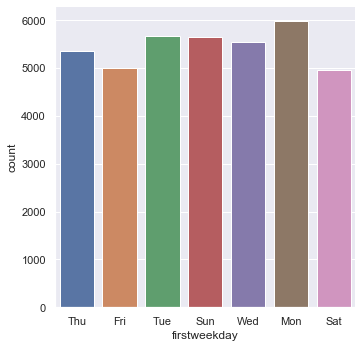

In [65]:
# Looking at data through the weekday data
plt.figure(figsize=(16,13))
sns.catplot(kind='count', x='firstweekday', data=train)

In [89]:
# Looking at the # of orders placed based on weekday
day_order_first = train.groupby('firstweekday')['# of Orders Placed', 
                                                '# Different products (SKUs) purchased',
                                               '# of Items Purchased',
                                                'Max Orders for one SKU'
                                               ].sum().sort_values(by='# of Orders Placed', ascending=False).reset_index()
day_order_first

,firstweekday,# of Orders Placed,# Different products (SKUs) purchased,# of Items Purchased,Max Orders for one SKU
0,Mon,6354.0,6030.0,6672.0,6309.0
1,Tue,6046.0,5719.0,6318.0,5988.0
2,Sun,5959.0,5698.0,6152.0,5911.0
3,Wed,5820.0,5592.0,6045.0,5783.0
4,Thu,5671.0,5403.0,5990.0,5626.0
5,Fri,5303.0,5042.0,5565.0,5262.0
6,Sat,5220.0,4984.0,5397.0,5189.0


In [90]:
# Using pandas 'melt' function to change the variables i want to use as count so i can use it for plotting multi bar plots
day_order_first_melt = day_order_first.melt('firstweekday', var_name='variables', value_name='sum')
day_order_first_melt

,firstweekday,variables,sum
0,Mon,# of Orders Placed,6354.0
1,Tue,# of Orders Placed,6046.0
2,Sun,# of Orders Placed,5959.0
3,Wed,# of Orders Placed,5820.0
4,Thu,# of Orders Placed,5671.0
5,Fri,# of Orders Placed,5303.0
6,Sat,# of Orders Placed,5220.0
7,Mon,# Different products (SKUs) purchased,6030.0
8,Tue,# Different products (SKUs) purchased,5719.0
9,Sun,# Different products (SKUs) purchased,5698.0


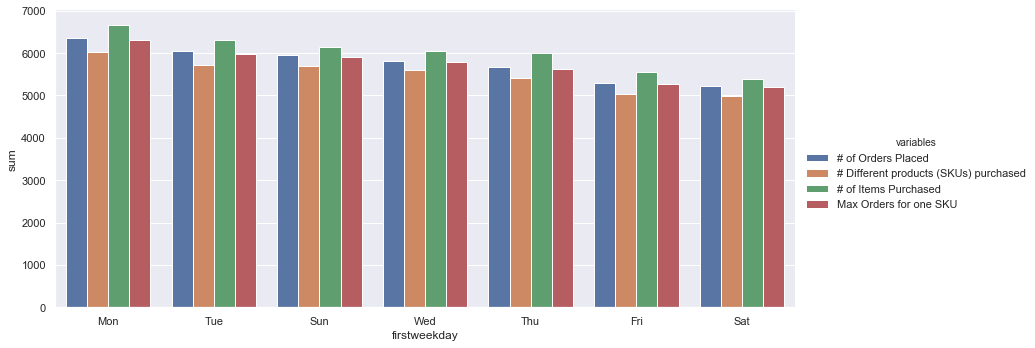

In [94]:
sns.catplot(x='firstweekday', y='sum', hue='variables', kind='bar', data=day_order_first_melt, height=5, aspect=2.3)

In [ ]:
# Based on the bar plot in the above, we can see that for the first purchase dates, monday seems to have the most purchases than other days
# Friday and saturday has the least as i'm guessing that most of the buyers spent that day either resting and spending time with friends or families
# The reason why monday and tuesday came out highest is i'm guessing, people couldnt get over the 'monday disease'......(jk), in other words, the people spent 
# more time looking for something to buy and actually purchased an order being it that it was a monday where not much people would really want to go to work!
# But it would be better if we were able to get the age span of each of the users because then we could be able to analyze even further based on the age span. 

In [95]:
day_order_last = train.groupby('lastweekday')['# of Orders Placed', 
                                                '# Different products (SKUs) purchased',
                                               '# of Items Purchased',
                                                'Max Orders for one SKU'
                                               ].sum().sort_values(by='# of Orders Placed', ascending=False).reset_index()
day_order_last

,lastweekday,# of Orders Placed,# Different products (SKUs) purchased,# of Items Purchased,Max Orders for one SKU
0,Mon,6335.0,6022.0,6680.0,6289.0
1,Wed,5947.0,5642.0,6165.0,5897.0
2,Tue,5933.0,5664.0,6200.0,5882.0
3,Sun,5932.0,5679.0,6123.0,5887.0
4,Thu,5772.0,5459.0,6040.0,5719.0
5,Fri,5268.0,5035.0,5575.0,5225.0
6,Sat,5186.0,4967.0,5356.0,5169.0


In [99]:
day_order_last_melt = day_order_last.melt('lastweekday', var_name='variables', value_name='sum')
day_order_last_melt

,lastweekday,variables,sum
0,Mon,# of Orders Placed,6335.0
1,Wed,# of Orders Placed,5947.0
2,Tue,# of Orders Placed,5933.0
3,Sun,# of Orders Placed,5932.0
4,Thu,# of Orders Placed,5772.0
5,Fri,# of Orders Placed,5268.0
6,Sat,# of Orders Placed,5186.0
7,Mon,# Different products (SKUs) purchased,6022.0
8,Wed,# Different products (SKUs) purchased,5642.0
9,Tue,# Different products (SKUs) purchased,5664.0


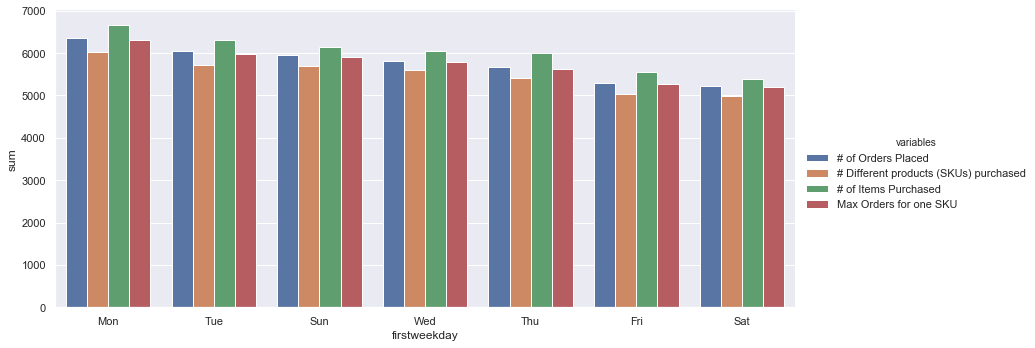

In [100]:
sns.catplot(x='firstweekday', y='sum', hue='variables', kind='bar', data=day_order_first_melt, height=5, aspect=2.3)

In [103]:
train.head()

,ClientId,# of Orders Placed,# Different products (SKUs) purchased,# of Items Purchased,Max Orders for one SKU,Total Value of all Orders Placed,City,State,Country,lastyear,firstyear,lasthm,firsthm,firstweekday,lastweekday,totaldays
0,29.0,2.0,1.0,2.0,2.0,27.97,ASPERS,PA,US,2019-03-15,2017-06-01,18:36,9:44,Thu,Fri,652 days
1,48.0,9.0,1.0,9.0,9.0,123.85,ELIZABETHTOWN,KY,US,2019-07-18,2017-06-23,1:49,12:57,Fri,Thu,755 days
2,63.0,4.0,1.0,4.0,4.0,57.92,BOCA RATON,FL,US,2018-06-17,2017-06-16,16:16,6:59,Fri,Sun,366 days
3,125.0,1.0,1.0,1.0,1.0,14.98,San Francisco,CA,US,2018-01-11,2017-06-27,17:47,21:02,Tue,Thu,198 days
4,136.0,1.0,1.0,1.0,1.0,31.99,EDEN,UT,US,2019-07-16,2017-06-27,10:10,16:31,Tue,Tue,749 days


In [105]:
train['lastyear'] = train['lastyear'].astype(str)
train['firstyear'] = train['firstyear'].astype(str)

In [108]:
train['lastmonth'] = train['lastyear'].apply(lambda x: x.split('-')[1])
train['firstmonth'] = train['firstyear'].apply(lambda x: x.split('-')[1])

In [110]:
train['lastYear'] = train['lastyear'].apply(lambda x: x.split('-')[0])
train['firstYear'] = train['firstyear'].apply(lambda x: x.split('-')[0])
train['lastday'] = train['lastyear'].apply(lambda x: x.split('-')[2])
train['firstday'] = train['firstyear'].apply(lambda x: x.split('-')[2])

In [111]:
train.head()

,ClientId,# of Orders Placed,# Different products (SKUs) purchased,# of Items Purchased,Max Orders for one SKU,Total Value of all Orders Placed,City,State,Country,lastyear,...,firsthm,firstweekday,lastweekday,totaldays,lastmonth,firstmonth,lastYear,firstYear,lastday,firstday
0,29.0,2.0,1.0,2.0,2.0,27.97,ASPERS,PA,US,2019-03-15,...,9:44,Thu,Fri,652 days,03,06,2019,2017,15,01
1,48.0,9.0,1.0,9.0,9.0,123.85,ELIZABETHTOWN,KY,US,2019-07-18,...,12:57,Fri,Thu,755 days,07,06,2019,2017,18,23
2,63.0,4.0,1.0,4.0,4.0,57.92,BOCA RATON,FL,US,2018-06-17,...,6:59,Fri,Sun,366 days,06,06,2018,2017,17,16
3,125.0,1.0,1.0,1.0,1.0,14.98,San Francisco,CA,US,2018-01-11,...,21:02,Tue,Thu,198 days,01,06,2018,2017,11,27
4,136.0,1.0,1.0,1.0,1.0,31.99,EDEN,UT,US,2019-07-16,...,16:31,Tue,Tue,749 days,07,06,2019,2017,16,27


In [112]:
train = train.drop(['lastyear', 'firstyear'], axis=1)

In [113]:
train.head()

,ClientId,# of Orders Placed,# Different products (SKUs) purchased,# of Items Purchased,Max Orders for one SKU,Total Value of all Orders Placed,City,State,Country,lasthm,firsthm,firstweekday,lastweekday,totaldays,lastmonth,firstmonth,lastYear,firstYear,lastday,firstday
0,29.0,2.0,1.0,2.0,2.0,27.97,ASPERS,PA,US,18:36,9:44,Thu,Fri,652 days,03,06,2019,2017,15,01
1,48.0,9.0,1.0,9.0,9.0,123.85,ELIZABETHTOWN,KY,US,1:49,12:57,Fri,Thu,755 days,07,06,2019,2017,18,23
2,63.0,4.0,1.0,4.0,4.0,57.92,BOCA RATON,FL,US,16:16,6:59,Fri,Sun,366 days,06,06,2018,2017,17,16
3,125.0,1.0,1.0,1.0,1.0,14.98,San Francisco,CA,US,17:47,21:02,Tue,Thu,198 days,01,06,2018,2017,11,27
4,136.0,1.0,1.0,1.0,1.0,31.99,EDEN,UT,US,10:10,16:31,Tue,Tue,749 days,07,06,2019,2017,16,27


In [118]:
train['firstmonth'] = train['firstmonth'].astype(int)
train['lastmonth'] = train['lastmonth'].astype(int)

In [120]:
# This is used to classify the various seasons of the first purchase date. 
# 1 = winter
# 2 = spring
# 3 = summer
# 4 = fall(autumn)
train.loc[(train['firstmonth'] >= 1) & (train['firstmonth'] <= 2) | (train['firstmonth'] == 12), 'firstseason'] = 1
train.loc[(train['firstmonth'] >= 3) & (train['firstmonth'] <= 5), 'firstseason'] = 2
train.loc[(train['firstmonth'] >= 6) & (train['firstmonth'] <= 8), 'firstseason'] = 3
train.loc[(train['firstmonth'] >= 9) & (train['firstmonth'] <= 11), 'firstseason'] = 4

In [125]:
train.tail(30)

,ClientId,# of Orders Placed,# Different products (SKUs) purchased,# of Items Purchased,Max Orders for one SKU,Total Value of all Orders Placed,City,State,Country,lasthm,...,firstweekday,lastweekday,totaldays,lastmonth,firstmonth,lastYear,firstYear,lastday,firstday,firstseason
38120,49878.0,1.0,1.0,1.0,1.0,12.99,DAPHNE,AL,US,6:36,...,Sat,Sat,0 days,8,8,2019,2019,17,17,3.0
38121,49879.0,1.0,1.0,1.0,1.0,12.99,DEARBORN,MI,US,14:47,...,Fri,Fri,0 days,8,8,2019,2019,16,16,3.0
38122,49880.0,1.0,1.0,1.0,1.0,14.98,Naperville,IL,US,7:30,...,Sat,Sat,0 days,8,8,2019,2019,17,17,3.0
38123,49881.0,1.0,1.0,1.0,1.0,14.98,Ashburn,VA,US,21:56,...,Fri,Fri,0 days,8,8,2019,2019,16,16,3.0
38124,49882.0,1.0,1.0,1.0,1.0,14.98,TUSTIN,CA,US,11:33,...,Sat,Sat,0 days,8,8,2019,2019,17,17,3.0
38125,49883.0,1.0,1.0,1.0,1.0,14.98,FANWOOD,NJ,US,17:21,...,Fri,Fri,0 days,8,8,2019,2019,16,16,3.0
38126,49885.0,1.0,1.0,1.0,1.0,14.98,Chapel Hill,NC,US,10:59,...,Sat,Sat,0 days,8,8,2019,2019,17,17,3.0
38127,49886.0,1.0,1.0,1.0,1.0,14.98,QUEEN CREEK,AZ,US,10:34,...,Sat,Sat,0 days,8,8,2019,2019,17,17,3.0
38128,49888.0,1.0,1.0,1.0,1.0,14.98,SCOTTSDALE,AZ,US,10:54,...,Sat,Sat,0 days,8,8,2019,2019,17,17,3.0
38129,49889.0,1.0,1.0,1.0,1.0,14.98,LEESBURG,VA,US,7:39,...,Sat,Sat,0 days,8,8,2019,2019,17,17,3.0


In [128]:
firstseason_data = train.groupby('firstseason')['# of Orders Placed',
                                               '# Different products (SKUs) purchased',
                                               '# of Items Purchased',
                                               'Max Orders for one SKU'].sum().sort_values(by='# of Orders Placed', ascending=False).reset_index()

In [129]:
firstseason_data

,firstseason,# of Orders Placed,# Different products (SKUs) purchased,# of Items Purchased,Max Orders for one SKU
0,2.0,12195.0,11675.0,12704.0,12100.0
1,1.0,11566.0,11071.0,12016.0,11470.0
2,3.0,10788.0,10385.0,11236.0,10727.0
3,4.0,5824.0,5337.0,6183.0,5771.0


In [130]:
firstseason_melt = firstseason_data.melt('firstseason', var_name='variables', value_name='sum')
firstseason_melt

,firstseason,variables,sum
0,2.0,# of Orders Placed,12195.0
1,1.0,# of Orders Placed,11566.0
2,3.0,# of Orders Placed,10788.0
3,4.0,# of Orders Placed,5824.0
4,2.0,# Different products (SKUs) purchased,11675.0
5,1.0,# Different products (SKUs) purchased,11071.0
6,3.0,# Different products (SKUs) purchased,10385.0
7,4.0,# Different products (SKUs) purchased,5337.0
8,2.0,# of Items Purchased,12704.0
9,1.0,# of Items Purchased,12016.0


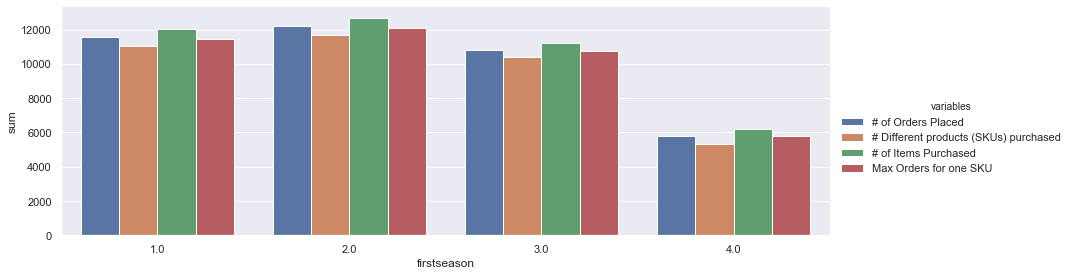

In [131]:
sns.catplot(kind='bar', x='firstseason', y='sum', hue='variables', data=firstseason_melt, height=4, aspect=3)

In [ ]:
# Based on the seasons graph, it is evidently clear that people have bought less in autumn or fall compared to the other seasons. 
# Spring has somewhat the highest purchases followed by winter and summer

In [127]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38142 entries, 0 to 38149
Data columns (total 21 columns):
ClientId                                 38142 non-null float64
# of Orders Placed                       38142 non-null float64
# Different products (SKUs) purchased    38142 non-null float64
# of Items Purchased                     38142 non-null float64
Max Orders for one SKU                   38142 non-null float64
Total Value of all Orders Placed         38142 non-null float64
City                                     38142 non-null object
State                                    38142 non-null object
Country                                  38142 non-null object
lasthm                                   38142 non-null object
firsthm                                  38142 non-null object
firstweekday                             38142 non-null object
lastweekday                              38142 non-null object
totaldays                                38142 non-null timedelta6

In [133]:
firstyear = train.groupby('firstYear')['# of Orders Placed',
                                               '# Different products (SKUs) purchased',
                                               '# of Items Purchased',
                                               'Max Orders for one SKU'].sum().reset_index()
firstyear

,firstYear,# of Orders Placed,# Different products (SKUs) purchased,# of Items Purchased,Max Orders for one SKU
0,2017,1086.0,816.0,1239.0,1067.0
1,2018,19713.0,18542.0,20841.0,19555.0
2,2019,19574.0,19110.0,20059.0,19446.0


In [135]:
firstyear_melt = firstyear.melt('firstYear', var_name = 'variables', value_name='sum')
firstyear_melt

,firstYear,variables,sum
0,2017,# of Orders Placed,1086.0
1,2018,# of Orders Placed,19713.0
2,2019,# of Orders Placed,19574.0
3,2017,# Different products (SKUs) purchased,816.0
4,2018,# Different products (SKUs) purchased,18542.0
5,2019,# Different products (SKUs) purchased,19110.0
6,2017,# of Items Purchased,1239.0
7,2018,# of Items Purchased,20841.0
8,2019,# of Items Purchased,20059.0
9,2017,Max Orders for one SKU,1067.0


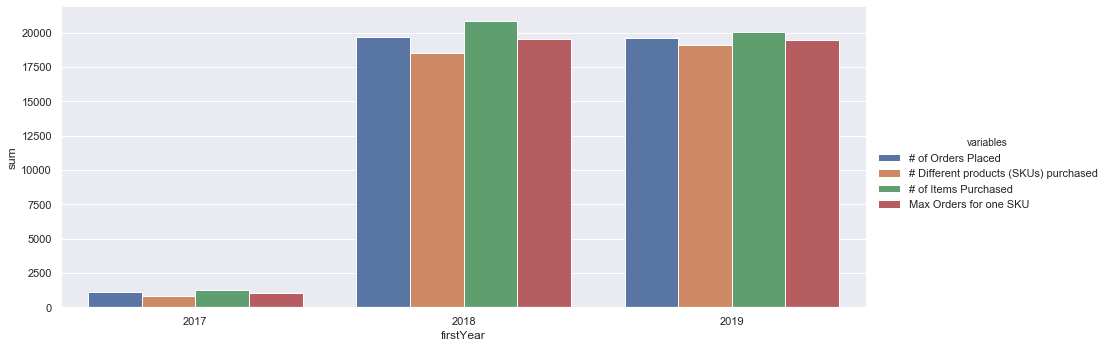

In [136]:
sns.catplot(kind='bar', x='firstYear', y='sum', hue='variables', data=firstyear_melt, height=5, aspect=2.5)

In [ ]:
# Baesd on the year to purchase graph in the above, we can see that there are significantly more purchases in 2018 and 2019 than 2017. 
# It seems that the purchasers werent either interested in the products or didnt know about them until 2018.
# Furthermore, the buyers continued to purchase even in 2019. 